In [7]:
from pylab import *
import matplotlib.pyplot as plt
import csv
import random
from pyds import MassFunction

In [8]:
def distance(d1, d2):
    res = 0
    for key in ("x", "y", "z"):
        res += (float(d1[key])-float(d2[key]))**2
    return res**0.5

In [9]:
with open("train_set_ex2_120.csv", "r") as f:
    reader = csv.DictReader(f)
    train_set = [row for row in reader]
random.shuffle(train_set)
for train in train_set:
    print(train)

{'x': '0.4886397648220631', 'y': '-1.151612259742418', 'z': '1.7007939015374416', 'L': '3'}
{'x': '-1.859041912906652', 'y': '2.801659805039872', 'z': '-0.9257532538161408', 'L': '2'}
{'x': '1.1410607012494056', 'y': '1.6216624020495054', 'z': '0.4014201317313141', 'L': '2'}
{'x': '1.6228398608873187', 'y': '0.8029855340856005', 'z': '1.1328133408701495', 'L': '1'}
{'x': '-2.059667560640599', 'y': '0.9114318815653811', 'z': '-0.024830123915427837', 'L': '2'}
{'x': '-0.6851915664390753', 'y': '-2.3263392995332275', 'z': '-0.33219528058629266', 'L': '3'}
{'x': '-1.103518265641818', 'y': '0.6138338715056507', 'z': '-0.20429940683630926', 'L': '2'}
{'x': '-0.139914370158013', 'y': '-0.4288570612766933', 'z': '-1.447556625898543', 'L': '2'}
{'x': '-1.4266567392130358', 'y': '0.07278635272146505', 'z': '0.8833773752190196', 'L': '2'}
{'x': '-1.0698889694289517', 'y': '-1.3266350602977206', 'z': '-2.0595103696348906', 'L': '3'}
{'x': '0.26897326584431624', 'y': '1.7070264144944673', 'z': '1.0

In [10]:
train_set_1 = [
    {"x": r['x'], "y": r['y'], "z": r['z'], "L": r['L']}
    for r in train_set
    if r['L'] == '1'
]
train_set_2 = [
    {"x": r['x'], "y": r['y'], "z": r['z'], "L": r['L']}
    for r in train_set
    if r['L'] == '2'
]
train_set_3 = [
    {"x": r['x'], "y": r['y'], "z": r['z'], "L": r['L']}
    for r in train_set
    if r['L'] == '3'
]
dist1 = 0
for d1 in train_set_1:
    for d2 in train_set_1:
        dist1 += distance(d1, d2)
gamma_q_1 = (len(train_set_1) - 1) * len(train_set_1) / dist1
dist2 = 0
for d1 in train_set_2:
    for d2 in train_set_2:
        dist2 += distance(d1, d2)
gamma_q_2 = (len(train_set_2) - 1) * len(train_set_2) / dist2
dist3 = 0
for d1 in train_set_3:
    for d2 in train_set_3:
        dist3 += distance(d1, d2)
gamma_q_3 = (len(train_set_3) - 1) * len(train_set_3) / dist3
print("gamma_q_1=", gamma_q_1)
print("gamma_q_2=", gamma_q_2)
print("gamma_q_3=", gamma_q_3)

gamma_q_1= 0.44191692273631594
gamma_q_2= 0.4634391465553436
gamma_q_3= 0.3162984322117841


In [11]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
alpha_0 = 0.95


def func1(d, gamma):
    return alpha_0 * exp(-gamma * d)


def knn(data, n, set, k):
    # 1.距离
    res = [
        {"result": train['L'], "distance":distance(data, train)}
        for train in set
    ]
    # 2.升序排序
    res = sorted(res, key=lambda item: item['distance'])
    # 3.取前k个
    res2 = res[0:k]
    result = {"1": 0, "2": 0, "3": 0}

    if n == 2:  # 加权平均Knn
        a = res2[k-1]['distance'] - res2[0]['distance']
        for r in res2:
            result[r['result']] += (res2[k-1]['distance']-r['distance'])/a
        max_result = max(result['1'], result['2'], result['3'])
        if result['1'] == max_result:
            return '1'
        elif result['2'] == max_result:
            return '2'
        else:
            return '3'

    elif n == 1:  # Knn
        for r in res2:
             result[r['result']] += 1
        max_result = max(result['1'], result['2'], result['3'])
        if result['1'] == max_result:
            return '1'
        elif result['2'] == max_result:
            return '2'
        else:
            return '3'

    else:  # 结合DS理论后的Knn
        res3 = [
            {"result": r['result'], "alpha": r['distance']}
            for r in res2
        ]
        for r in res3:
            if r['result'] == '1':
                r['alpha'] = func1(r['alpha'], gamma_q_1)
            elif r['result'] == '2':
                r['alpha'] = func1(r['alpha'], gamma_q_2)
            else:
                r['alpha'] = func1(r['alpha'], gamma_q_3)
        res_1 = []
        res_2 = []
        res_3 = []
        for r in res3:
            if r['result'] == '1':
                res_1.append(r)
            elif r['result'] == '2':
                res_2.append(r)
            else:
                res_3.append(r)
        a_1 = 1
        a_2 = 1
        a_3 = 1
        for r in res_1:
            a_1 = a_1 * (1 - r['alpha'])
        for r in res_2:
            a_2 = a_2 * (1 - r['alpha'])
        for r in res_3:
            a_3 = a_3 * (1 - r['alpha'])

        M1 = MassFunction({'1': 1 - a_1, '2': 0, '3': 0, '123': a_1})
        M2 = MassFunction({'1': 0, '2': 1 - a_2, '3': 0, '123': a_2})
        M3 = MassFunction({'1': 0, '2': 0, '3': 1 - a_3, '123': a_3})
        M = M1 & M2 & M3
        max_bel = max(M.bel({'1'}), M.bel({'2'}), M.bel({'3'}))
        max_pl = max(M.pl({'1'}), M.pl({'2'}), M.pl({'3'}))
        if M.bel({'1'}) == max_bel:
            return '1'
        elif M.bel({'2'}) == max_bel:
            return '2'
        else:
            return '3'

In [12]:
K = range(2, 25)
name_test_set = ['test_set_ex2_1.csv', 'test_set_ex2_2.csv', 'test_set_ex2_3.csv', 'test_set_ex2_4.csv',
                 'test_set_ex2_5.csv']
rates_right_knn = []
rates_right_wknn = []
rates_right_dsknn = []
for k in K:
    rate_right_knn = 0
    rate_right_wknn = 0
    rate_right_dsknn = 0
    for name in name_test_set:
        with open(name, "r") as f:
            reader = csv.DictReader(f)
            test_set = [row for row in reader]
        random.shuffle(test_set)
        correct_knn = 0
        correct_wknn = 0
        correct_dsknn = 0
        for test in test_set:
            result = test['L']
            result_knn = knn(test, 1, train_set, k)
            result_wknn = knn(test, 2, train_set, k)
            result_dsknn = knn(test, 3, train_set, k)
            if result == result_knn:
                correct_knn += 1
            if result == result_wknn:
                correct_wknn += 1
            if result == result_dsknn:
                correct_dsknn += 1
        rate_right_knn += 100 * correct_knn / len(test_set)
        rate_right_wknn += 100 * correct_wknn / len(test_set)
        rate_right_dsknn += 100 * correct_dsknn / len(test_set)

    rate_right_knn /= 5
    rates_right_knn.append(rate_right_knn)
    rate_right_wknn /= 5
    rates_right_wknn.append(rate_right_wknn)
    rate_right_dsknn /= 5
    rates_right_dsknn.append(rate_right_dsknn)
print("knn的正确率", rates_right_knn)
print("权重knn的正确率", rates_right_wknn)
print("DS-knn的正确率", rates_right_dsknn)

knn的正确率 [69.17999999999999, 70.94, 72.34, 72.52000000000001, 72.94, 73.35999999999999, 73.44, 73.52000000000001, 73.88, 73.64000000000001, 73.82000000000001, 74.28, 74.23999999999998, 74.06, 74.5, 74.68, 74.4, 74.17999999999999, 74.22, 74.68, 74.1, 74.36, 74.47999999999999]
权重knn的正确率 [66.44000000000001, 66.44000000000001, 67.84, 69.16, 70.46000000000001, 71.82, 72.93999999999998, 73.35999999999999, 73.64, 73.75999999999999, 74.03999999999999, 74.03999999999999, 74.2, 74.35999999999999, 74.32, 74.28, 74.56, 74.58, 74.72, 74.70000000000002, 74.6, 74.56, 74.61999999999999]
DS-knn的正确率 [65.32000000000001, 70.46, 71.3, 72.64, 73.78, 74.1, 74.16, 74.22, 74.56000000000002, 75.2, 74.96000000000001, 75.4, 75.24000000000001, 75.72, 75.32000000000001, 75.74000000000001, 75.58, 75.9, 75.9, 75.94000000000001, 75.9, 75.64000000000001, 75.75999999999999]


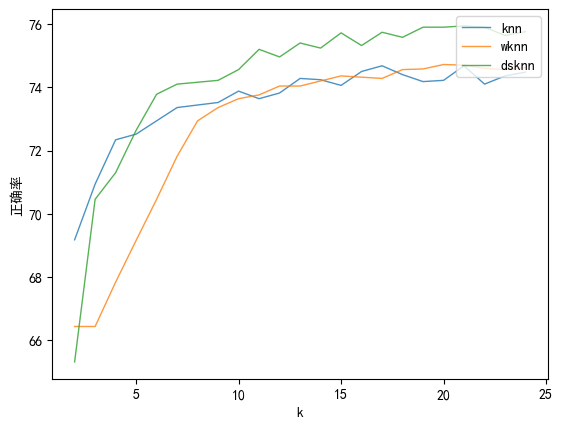

In [13]:
plt.plot(K, rates_right_knn, alpha=0.8, linewidth=1, label='knn')
plt.plot(K, rates_right_wknn, alpha=0.8, linewidth=1, label='wknn')
plt.plot(K, rates_right_dsknn, alpha=0.8, linewidth=1, label='dsknn')
plt.legend(loc="upper right")
plt.xlabel('k')
plt.ylabel('正确率')
plt.show()